## Homework 3 - Part 1
## Decision Tree and Random forest

In this homework, you will perform classification on the provided datasets using Decision Tree and Random Forest algorithms. 

The first dataset you will be working with contains 2 features. The second dataset contains 50 features. Both of them have a target label which can be 0 or 1.

You will go step by step with the first dataset. <br>
1 - Use a Decision Tree Classifier and observe the model performance.<br>
2 - Use a Random Forest Classifier and observe the model performance.<br>
3 - Use Grid Search to choose the optimal values for hyperparameters and observe the performance of the best model.


For the second dataset, you are required to generate an optimized Random Forest model using what you have learned in the steps mentioned above.

Dataset 1:
train_2features.csv and test_2features.csv are the training set and testing set respecitvely.


Dataset 2:
train_50features.csv and test_50features.csv are the training set and testing set respecitvely.


To obtain a deterministic behavior, keep the random_state in all algorithms fixed to the value given. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import visualize_2d_data
import warnings

In [ ]:
warnings.filterwarnings("ignore")

# Dataset 1

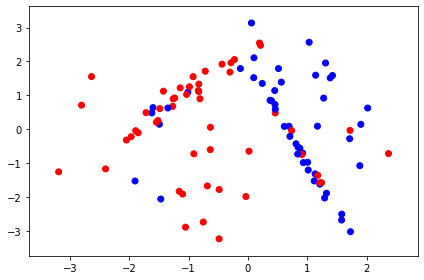

In [2]:
train_df = pd.read_csv("train_2features.csv")
f, ax = visualize_2d_data(train_df)

In [3]:
train_df.head()

,x1,x2,y
0,0.455178,0.727672,1
1,-0.303342,1.684185,0
2,-1.100127,-1.914980,0
3,1.129869,-1.319774,1
4,0.396403,0.836826,1


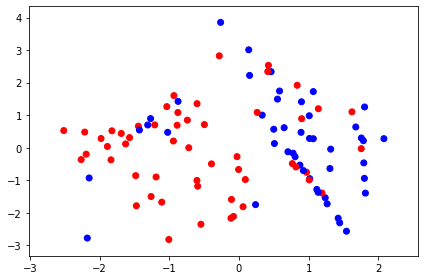

In [4]:
test_df = pd.read_csv("test_2features.csv")
f, ax = visualize_2d_data(test_df)

In [5]:
test_df.head()

,x1,x2,y
0,-1.260875,-1.496315,0
1,1.804029,1.253803,1
2,-1.627030,0.118947,0
3,-1.888437,0.040332,0
4,1.140222,1.199631,0


Q. From the above visualizations, what can you tell about the need for a linear/non-linear model for classification?

It is very hard to use a linear model in order to classify bads and goods in the model since there is no linear trend whatsoever in the model attributes. Using linear model won't be a proper fit for this model as it will give a lot of error in the process. Thus, it would be better to use non-linear model such as decision tree/random forests in order to carry out the classification.

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [7]:
### Fit the classifier on the training data

### WRITE CODE HERE ###

x_train = train_df[['x1','x2']]
y_train = train_df[['y']]

clf = DecisionTreeClassifier(random_state=26)

clf = clf.fit(x_train,y_train)

In [8]:
### Make predictions on the training data

### WRITE CODE HERE ###

y_pred_train = clf.predict(x_train)
y_pred_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [9]:
### WRITE CODE HERE ###

print("Accuracy:",accuracy_score(y_train, y_pred_train))
print("Precision:",precision_score(y_train, y_pred_train))
print("Recall:",recall_score(y_train, y_pred_train))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [10]:
### Make predictions on the testing data

### WRITE CODE HERE ###

x_test = test_df[['x1','x2']]
y_test = test_df[['y']]

y_pred_test = clf.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [11]:
### WRITE CODE HERE ###
print("Accuracy:",accuracy_score(y_test, y_pred_test))
print("Precision:",precision_score(y_test, y_pred_test))
print("Recall:",recall_score(y_test, y_pred_test))

Accuracy: 0.69
Precision: 0.6818181818181818
Recall: 0.6382978723404256


Q. Plot ROC curve and obtain AUC for test predictions

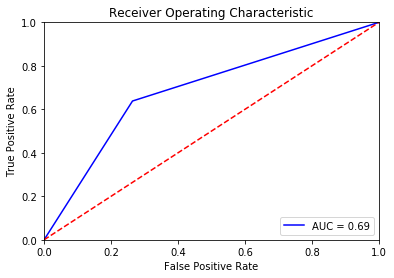

In [12]:
# Plot the ROC curve by giving appropriate names for title and axes. 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### WRITE CODE HERE

fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.

The model was running perfectly fine on the training dataset because the model was built on train data. For test dataset, the accuracy, precision and recall are not that great and therefore random forests is used. The model on the test data is overfit and therefore it has low bias and high variance.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
### Fit the classifier on the training data

clf = RandomForestClassifier(random_state=26)

### WRITE CODE HERE ###

clf = clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [15]:
### Make predictions on the training data


### WRITE CODE HERE ###

y_pred_train = clf.predict(x_train)
y_pred_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

Q. Print accuracy, prediction and recall for the predictions made on the training data. 

In [16]:
### WRITE CODE HERE ###

print("Accuracy:",accuracy_score(y_train, y_pred_train))
print("Precision:",precision_score(y_train, y_pred_train))
print("Recall:",recall_score(y_train, y_pred_train))

Accuracy: 0.99
Precision: 1.0
Recall: 0.9795918367346939


In [17]:
### Make predictions on the testing data


### WRITE CODE HERE ###

y_pred_test = clf.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

Q. Print accuracy, prediction and recall for the predictions made on the testing data. 

In [18]:
### WRITE CODE HERE ###

print("Accuracy:",accuracy_score(y_test, y_pred_test))
print("Precision:",precision_score(y_test, y_pred_test))
print("Recall:",recall_score(y_test, y_pred_test))

Accuracy: 0.72
Precision: 0.7021276595744681
Recall: 0.7021276595744681


Q. Plot ROC curve and obtain AUC for the test predictions

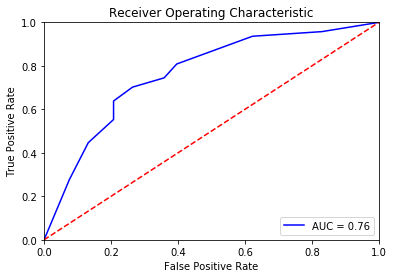

In [19]:
# Plot the ROC curve by giving appropriate names for title and axes. 

### WRITE CODE HERE

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### WRITE CODE HERE

probs_test = clf.predict_proba(x_test)
preds_test = probs_test[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_test)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
roc_auc

0.7643516659975913

Q. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. 

The random forests model was performing good on training set which is obvious. But the model on the testing dataset is performing better as compared to the decision tree model discussed previously. The model is still overfit means it has high variance and low bias. But the Random Forest is better than the Decision Tree model. The peroformance has improved because the Random Forest model has reduced overfitting.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': np.linspace(1, 8, 8, endpoint=True),
    'max_features': list(range(1,train_df.shape[1])),
    'min_samples_leaf': np.linspace(0.01, 0.5, 10, endpoint=True),
    'min_samples_split': np.linspace(0.05, 0.8, 10, endpoint=True),
    'n_estimators': [1, 2, 4, 8, 16]
}

In [23]:
rf = RandomForestClassifier(random_state=26)

In [24]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [25]:
### Fit the training data

### WRITE CODE HERE ###

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 8000 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 2100 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 4364 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 7284 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 10844 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 15060 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 19916 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 24000 out of 24000 | elapsed:   40.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-package

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                         'min_samples_leaf': array([0.01      , 0.06444444, 0.11888889, 0.17333333, 0.22777778,
       0.28222222, 0.33666667, 0.39111111, 0.4

Q. Display the parameters of the best model.

In [26]:
### WRITE CODE HERE ###
grid_search.best_params_

{'max_depth': 2.0,
 'max_features': 1,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.05,
 'n_estimators': 8}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy for train: 0.83
Precision for train: 0.8076923076923077
Recall for train: 0.8571428571428571
Accuracy for test: 0.79
Precision for test: 0.75
Recall for test: 0.8297872340425532


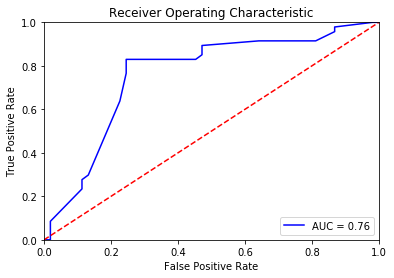

In [27]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the testing set and display accuracy, precision and recall. Plot ROC curve and print AUC.


### WRITE CODE HERE ###

best_grid = grid_search.best_estimator_
clf = best_grid.fit(x_train,y_train)

y_pred_train = clf.predict(x_train)
y_pred_train

print("Accuracy for train:",accuracy_score(y_train, y_pred_train))
print("Precision for train:",precision_score(y_train, y_pred_train))
print("Recall for train:",recall_score(y_train, y_pred_train))

y_pred_test = clf.predict(x_test)
y_pred_test

print("Accuracy for test:",accuracy_score(y_test, y_pred_test))
print("Precision for test:",precision_score(y_test, y_pred_test))
print("Recall for test:",recall_score(y_test, y_pred_test))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

probs_test = clf.predict_proba(x_test)
preds_test = probs_test[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds_test)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
roc_auc

0.7587314331593737

Q. How did performing Grid Search impact the performance of the model? Were you able to optimize the hyperparameters?

Yes, the grid search impacted the performance of the model in a positive way. All the three metrics on the test data i.e. accuracy, precision, recall increased from the default Random Forest model. This means that the model is performing better now. The main reason for this to happen was because the hyperparameters were optimised during the grid search.

# Dataset 2

Given this procedure, you are to optimize a random forest classifier for a dataset with 50 features. Training data are provided, but testing data does not include the labels. It is up to you to use the training data to optimize generalization performance to the test data. You will submit a csv file with your predictions. It should contain one column and the column should be named "y".


In [29]:
train_df = pd.read_csv("train_50features.csv")
test_data = pd.read_csv("test_50features.csv")

In [30]:
y_train = train_df[['y']]
x_train = train_df.drop(['y'], axis = 1)

y_train = train_df[['y']]
x_train = train_df.drop(['y'], axis = 1)

In [31]:
#Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.linspace(1, 8, 8, endpoint=True),
    'max_features': list(range(1,train_df.shape[1])),
    'min_samples_leaf': np.linspace(0.03, 0.3, 5, endpoint=True),
    'min_samples_split': np.linspace(0.05, 0.5, 5, endpoint=True),
    'n_estimators': [1, 2, 4, 8, 16, 32]
}

In [32]:
rf = RandomForestClassifier(random_state=26)

In [33]:
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [34]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 60000 candidates, totalling 180000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2304 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 6364 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 12024 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 19324 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 28224 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 38764 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 50904 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 64684 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 80064 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 97084 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 115704 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 135964 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 157824 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
             param_grid={'max_depth': array([1., 2., 3., 4., 5., 6., 7., 8.]),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [35]:
grid_search.best_params_

{'max_depth': 1.0,
 'max_features': 3,
 'min_samples_leaf': 0.165,
 'min_samples_split': 0.05,
 'n_estimators': 8}

In [36]:
best_grid = grid_search.best_estimator_
clf = best_grid.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy for train: 0.75
Precision for train: 0.8648648648648649
Recall for train: 0.6153846153846154


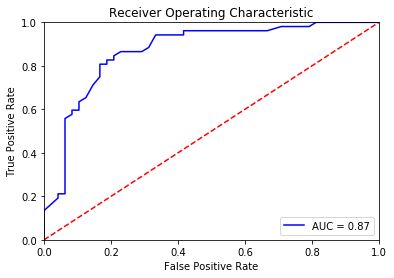

In [37]:
y_pred_train = clf.predict(x_train)
y_pred_train

print("Accuracy for train:",accuracy_score(y_train, y_pred_train))
print("Precision for train:",precision_score(y_train, y_pred_train))
print("Recall for train:",recall_score(y_train, y_pred_train))

probs_train = clf.predict_proba(x_train)
preds_train = probs_train[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds_train)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
y_pred_test = clf.predict(test_data)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [44]:
### save into csv with column heading as "y"
predicted_df = pd.DataFrame(y_pred_test, columns = ["y"])
predicted_df.index = np.arange(1,len(predicted_df)+1)
pd.DataFrame(predicted_df).to_csv("prediction.csv")


What can you tell about the range of values to be considered for each of the parameters mentioned above? Explain the reason for choosing the ranges mentioned in your solution.  Also, how does each of these parameters affect overfitting in the model? 

The range of the values considered in the parameters above are on the basis of basic logic and some already known facts the parameters. The range for the max depth of tree was mentioned to be from 1 to 8 both inclusive. 8 was given as the maximum value of the depth of the tree because after that the model would start overfitting. Similar logic was while enterting the number of estimators. The range of the estimators was from 1, 2, 4, 8, 16, 32. Increasing more than 32 does not make sense as it could cause overfitting. The maximum number of features was given a range from 1 to the maximum number of features in the model, this would give the model flexibility to choose the number of features itself. For the case of minimum samples split, it was given a range from 5% to 50% of the dataset samples and for minimum samples leaf, range was provided from 3% to 30%. Both of these ranges were given keeping in mind that there should be alteast some percentage of samples left in the nodes and the leaves to run the tree properly.